In [1]:
import numpy as np
import scipy.sparse as sps
import scipy.linalg as spl
import scipy.sparse.linalg as spsl
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import xarray as xr
%matplotlib inline

from scipy.special import legendre,lpmv,factorial
from pyshtools.legendre import PlmSchmidt_d1

import time

from tools import *

In [2]:
picked = dat_to_xarray("data/fullrun789/picked_mode.dat")

In [3]:
layered_l = dat_to_xarray("data/fullrun789/sph_pwr_layer_l.dat")
layered_m = dat_to_xarray("data/fullrun789/sph_pwr_layer_m.dat")
layered_lm = dat_to_xarray("data/fullrun789/sph_pwr_layer_lm.dat")

layered_s = dat_to_xarray("data/fullrun789/sph_pwr_layer_s.dat")

In [4]:
layered_l_radial = dat_to_xarray("data/radial790/sph_pwr_layer_l.dat")
picked_radial = dat_to_xarray("data/radial790/picked_mode.dat")

In [5]:
layered_s_radial = dat_to_xarray("data/radial790/sph_pwr_layer_s.dat")

# Base of the stratified layer

In [80]:
cds = dat_to_xarray("data/picked_mode.dat")

In [50]:
def find_stratlayer(temp,radius):
    idx = np.argmin(np.gradient(temp,radius)**2)
    return radius[idx],idx

In [51]:
print("last tstep : %f // %i"%find_stratlayer(cds.temperature.isel(t_step=-1).squeeze(),cds.radius))
print("200 last tsteps : %f // %i"%find_stratlayer(cds.temperature.isel(t_step=slice(-200,-1)).mean('t_step').squeeze(),cds.radius))
print("200 first tsteps : %f // %i"%find_stratlayer(cds.temperature.isel(t_step=slice(0,200)).mean('t_step').squeeze(),cds.radius))

last tstep : 1.475771 // 302
200 last tsteps : 1.481967 // 305
200 first tsteps : 1.483965 // 306


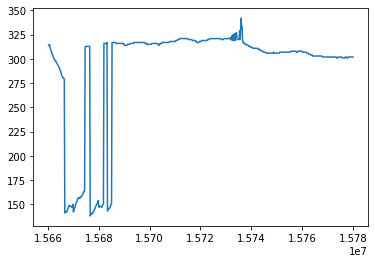

In [56]:
plt.plot(cds.t_step,[find_stratlayer(cds.temperature.sel(t_step=ts).squeeze().data,cds.radius)[1] for  ts in cds.t_step])

In [53]:
len(cds.radius)

361

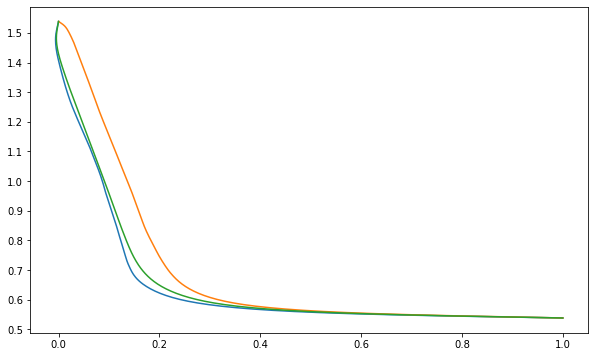

In [57]:

_,ax=plt.subplots(1,1,figsize=(10,6))
ax.plot(cds.temperature.isel(t_step=-1).squeeze(),cds.radius)
ax.plot(cds.temperature.sel(t_step=15670000).squeeze(),cds.radius)
ax.plot(cds.temperature.isel(t_step=slice(-200,-1)).mean('t_step').squeeze(),cds.radius)
ax.set_yticks(np.arange(0.5,1.6,.1));None

# Plotting picked modes / layered power spectra 

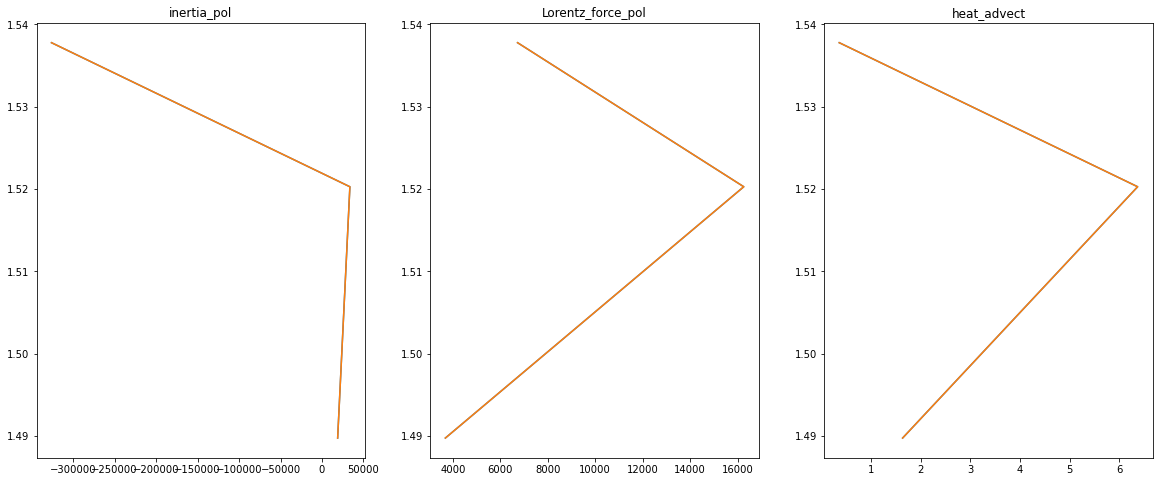

In [7]:
_,ax=plt.subplots(1,3,figsize=(20,8))

for a,var in zip(ax,['inertia_pol','Lorentz_force_pol','heat_advect']):
    a.plot(picked[var].sel(degree=3).mean('t_step').squeeze(),picked.radius)
    a.plot(picked[var].sel(degree=3).mean('t_step').squeeze(),picked.radius)
    a.set_title(var)

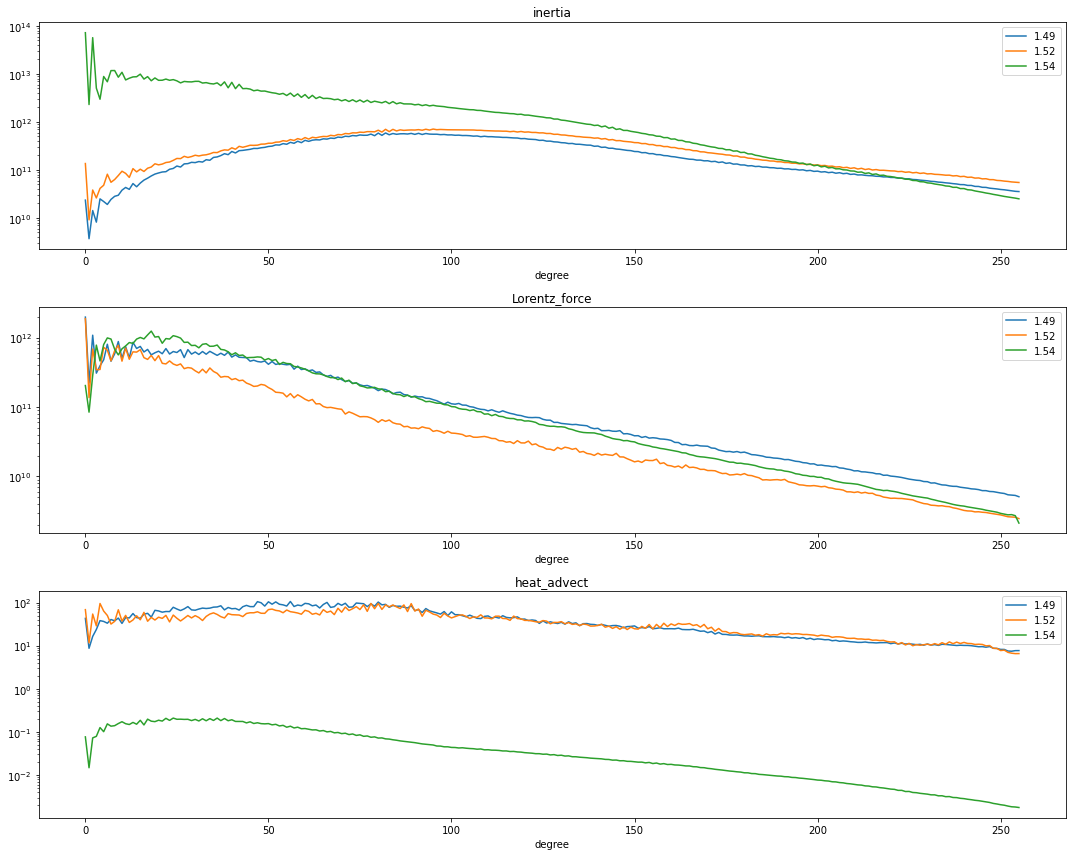

In [14]:
fig,ax=plt.subplots(3,1,figsize=(15,12))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(3):
        a.plot(layered_l.degree,layered_l[var].isel(radial_id=i).mean('t_step').squeeze(),label="%.2f"%picked.radius[i])
    a.set_title(var)
    a.set_xlabel('degree')
    a.set_yscale('log')
    a.legend()
fig.tight_layout()

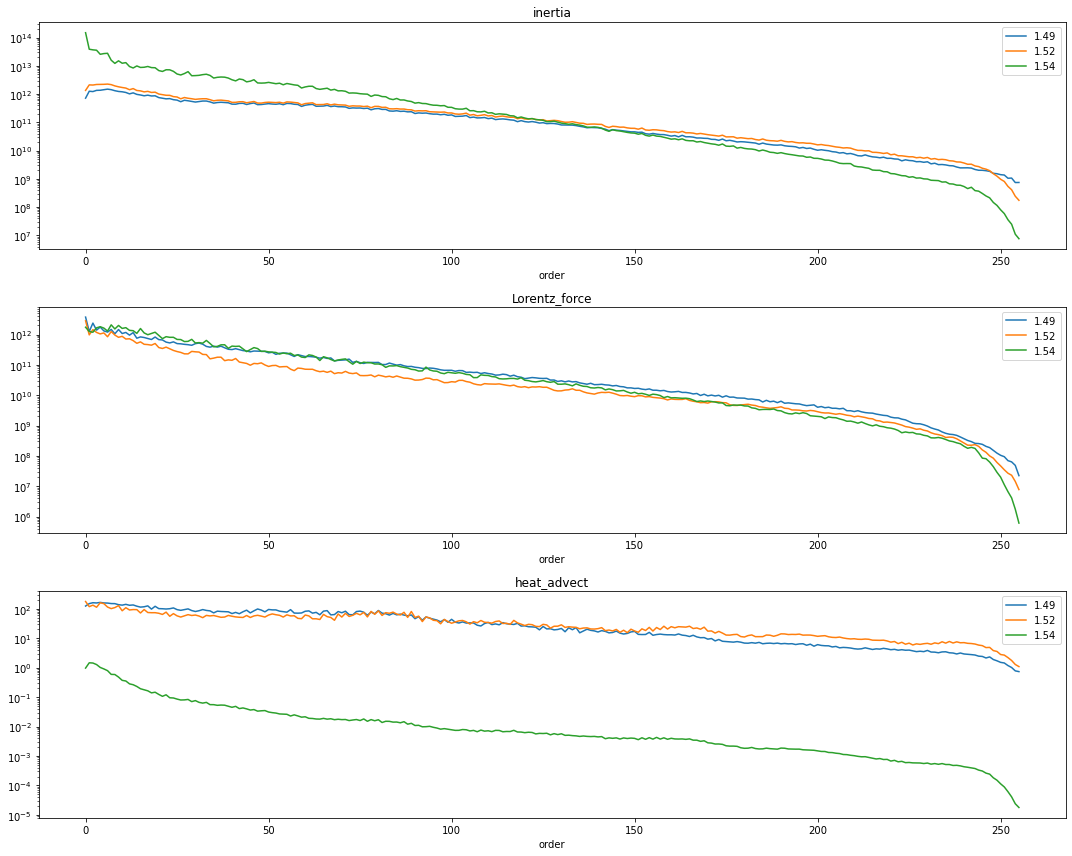

In [18]:
fig,ax=plt.subplots(3,1,figsize=(15,12))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(3):
        a.plot(layered_m.order,layered_m[var].isel(radial_id=i).mean('t_step').squeeze(),label="%.2f"%picked.radius[i])
    a.set_title(var)
    a.set_xlabel('order')
    a.set_yscale('log')
    a.legend()
fig.tight_layout()

# Radial dependence of the forcings

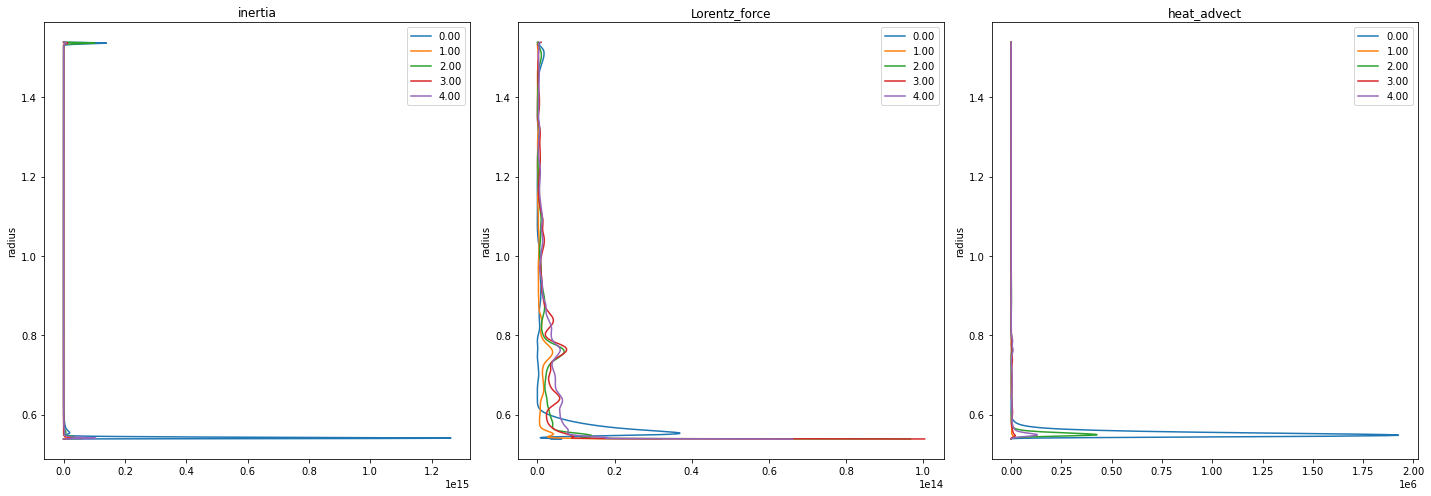

In [45]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(5):
        a.plot(layered_l_radial[var].isel(degree=i).mean('t_step').squeeze(),picked_radial.radius,label="%.2f"%layered_l_all.degree[i])
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
fig.tight_layout()

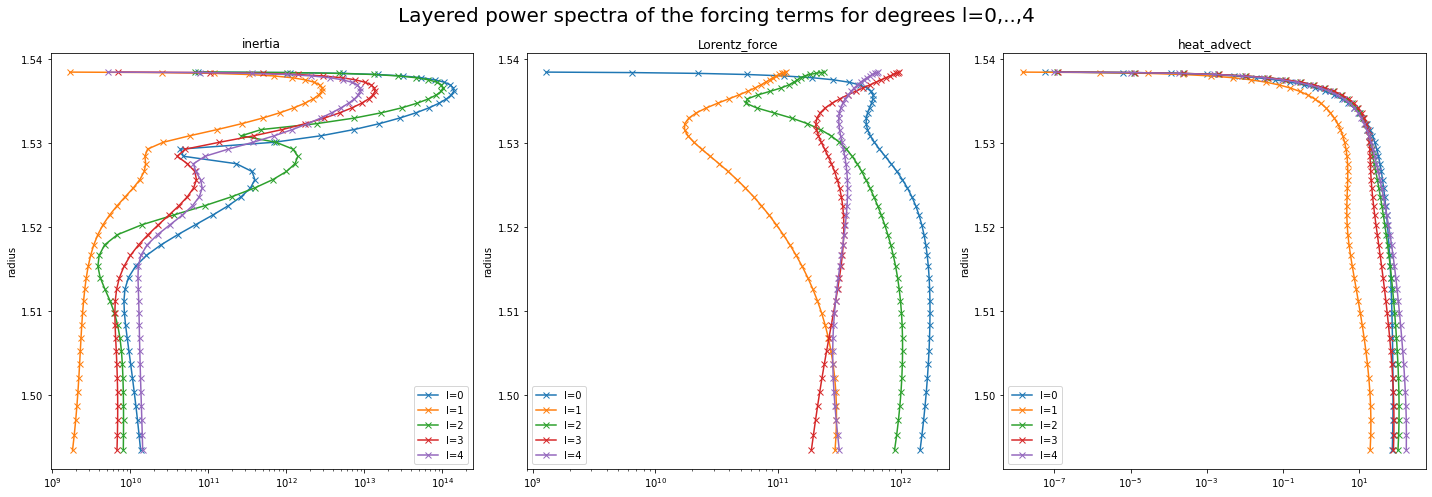

In [25]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(5):
        a.plot(layered_l_radial[var].isel(degree=i,radial_id=slice(-50,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="l=%i"%i)
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    a.set_xscale('log')
fig.suptitle("Layered power spectra of the forcing terms for degrees l=0,..,4",fontsize=20)
fig.tight_layout()



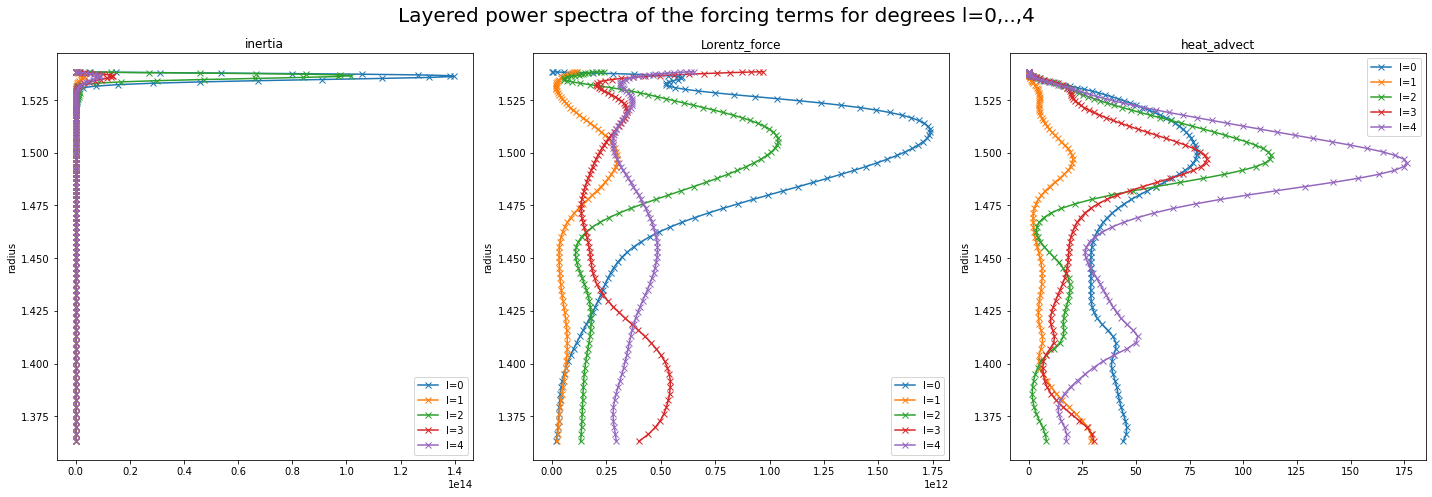

In [69]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    for i in range(5):
        a.plot(layered_l_radial[var].isel(degree=i,radial_id=slice(-100,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-100,-1)),'-x',label="l=%i"%i)
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    #a.set_xscale('log')
fig.suptitle("Layered power spectra of the forcing terms for degrees l=0,..,4",fontsize=20)
fig.tight_layout()



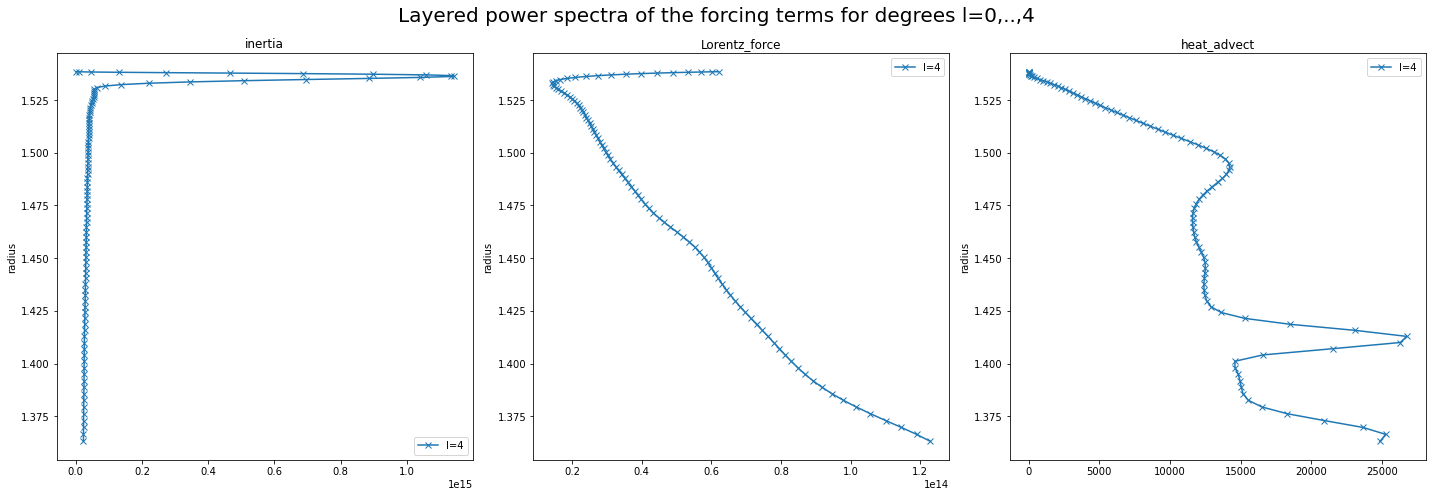

In [73]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','Lorentz_force','heat_advect']):
    a.plot(layered_s_radial[var].isel(radial_id=slice(-100,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-100,-1)),'-x',label="l=%i"%i)
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    #a.set_xscale('log')
fig.suptitle("Layered power spectra of the forcing terms for degrees l=0,..,4",fontsize=20)
fig.tight_layout()



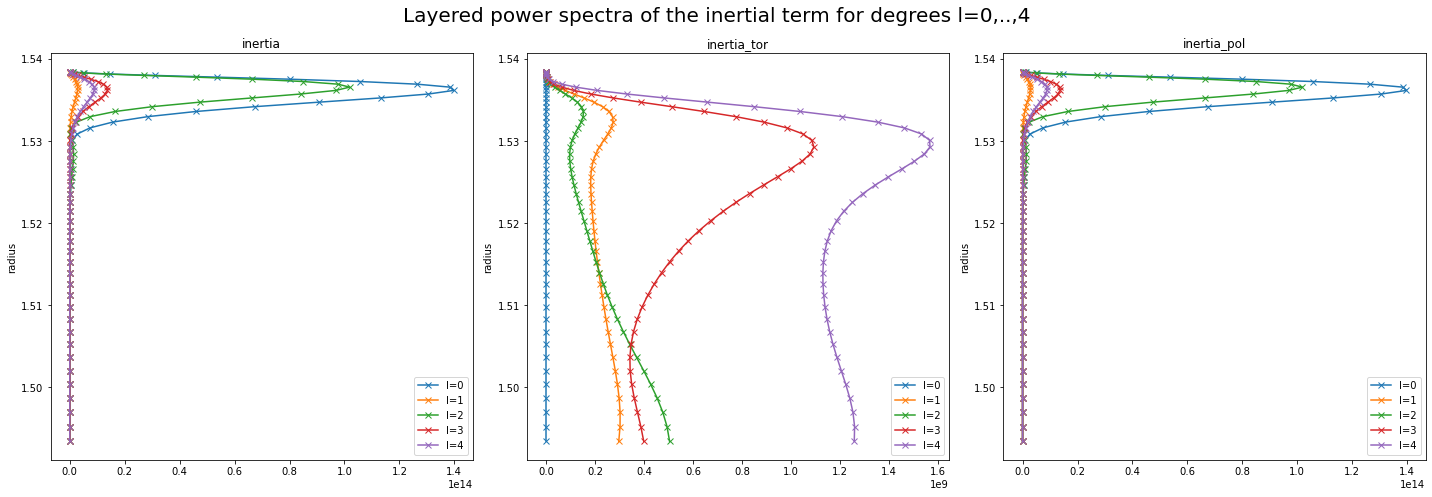

In [62]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','inertia_tor','inertia_pol']):
    for i in range(5):
        a.plot(layered_l_radial[var].isel(degree=i,radial_id=slice(-50,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="l=%i"%layered_l_all.degree[i])
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    
fig.suptitle("Layered power spectra of the inertial term for degrees l=0,..,4",fontsize=20)
fig.tight_layout()



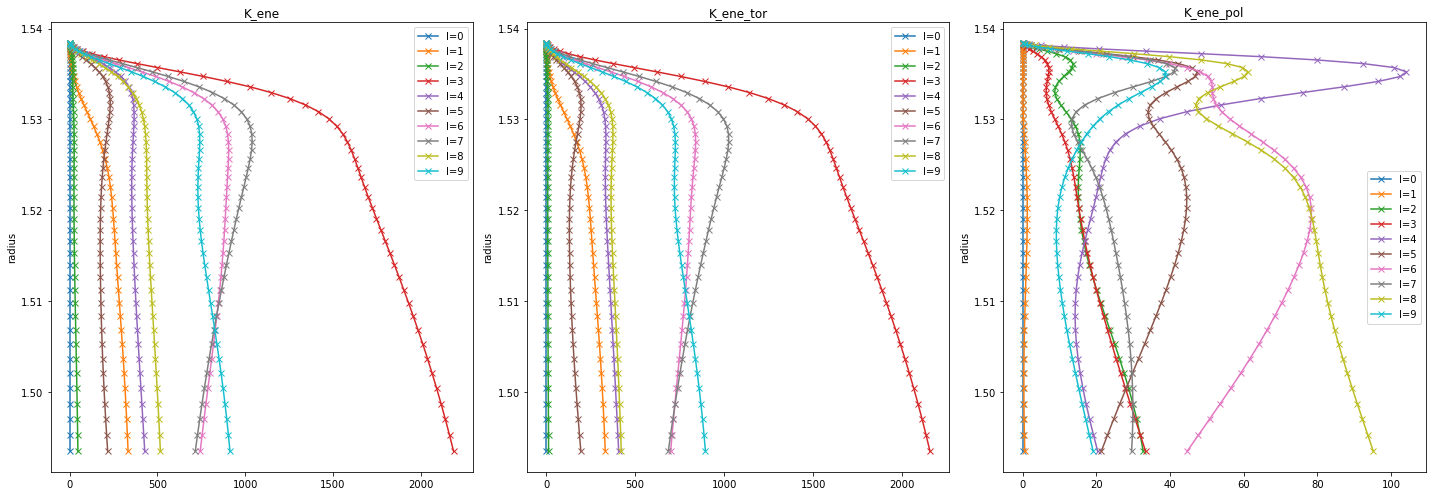

In [60]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['K_ene','K_ene_tor','K_ene_pol']):
    for i in range(10):
        a.plot(layered_l_radial[var].isel(degree=i,radial_id=slice(-50,-1)).mean('t_step').squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="l=%i"%layered_l_all.degree[i])
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
fig.tight_layout()



In [64]:
layered_s_radial_789 = dat_to_xarray("data/radial789/sph_pwr_layer_s.dat")
layered_s_radial_790 = dat_to_xarray("data/radial790/sph_pwr_layer_s.dat")


In [76]:
for sim in (layered_s_radial_789,layered_s_radial_790):
    print("n")
    for i in range(len(sim.t_step)):
        vals = sim[var].isel(t_step=i,radial_id=slice(-50,-1)).squeeze()
        valb = sim[var].isel(t_step=i,radial_id=-40).squeeze()
        print("%.1f"%(max(vals)/valb))


n
27.2
26.9
26.4
25.9
25.3
n
29.0
29.0


In [77]:
for sim in (layered_s_radial_789,layered_s_radial_790):
    print("n")
    for i in range(len(sim.t_step)):
        vals = sim[var].isel(t_step=i,radial_id=slice(-50,-1)).squeeze()
        valb = sim[var].isel(t_step=i,radial_id=-25).squeeze()
        print("%.1f"%(max(vals)/valb))


n
19.3
19.5
19.6
19.5
19.3
n
20.3
20.5


In [87]:
for sim in (layered_s_radial_789,layered_s_radial_790):
    print("n")
    for i in range(len(sim.t_step)-1):
        valip1 = sim[var].isel(t_step=i+1,radial_id=slice(-20,-1)).squeeze()
        vali = sim[var].isel(t_step=i,radial_id=slice(-20,-1)).squeeze()
        print("%.4f"%(max(valip1)/max(vali)))


n
0.9400
0.9487
0.9586
0.9674
n
1.0339


In [88]:
0.95**100

0.0059205292203339975

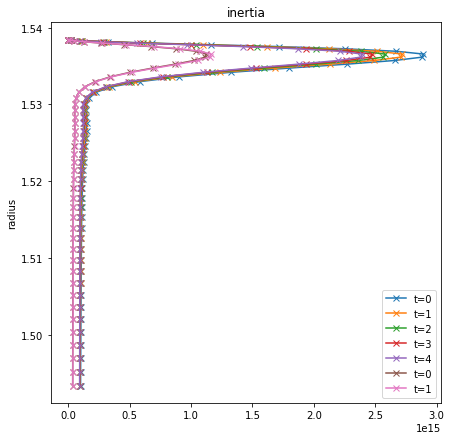

In [83]:
fig,a=plt.subplots(1,1,figsize=(7,7))
var='inertia'
for i in range(len(layered_s_radial_789.t_step)):
    a.plot(layered_s_radial_789[var].isel(t_step=i,radial_id=slice(-50,-1)).squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="t=%i"%i)

for i in range(len(layered_s_radial_790.t_step)):
    a.plot(layered_s_radial_790[var].isel(t_step=i,radial_id=slice(-50,-1)).squeeze(),picked_radial.radius.isel(radius_ID=slice(-50,-1)),'-x',label="t=%i"%i)

    
    
a.set_title(var)
a.set_ylabel('radius')
a.legend()
    

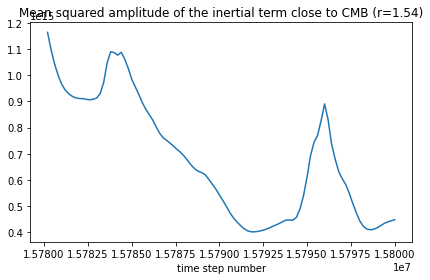

In [93]:
plt.plot(layered_s.t_step,layered_s.inertia.sel(radial_id=355).squeeze())
plt.title("Mean squared amplitude of the inertial term close to CMB (r=1.54)")
plt.xlabel("time step number")
plt.tight_layout()

In [7]:
picked_0 = dat_to_xarray("data/picked_bruce.dat")
picked_0_2 = dat_to_xarray("data/picked_bruce2.dat")

In [5]:
picked_0.t_step[-1]

<xarray.DataArray 't_step' ()>
array(15920000)
Coordinates:
    t_step   int64 15920000
    time     float64 7.807

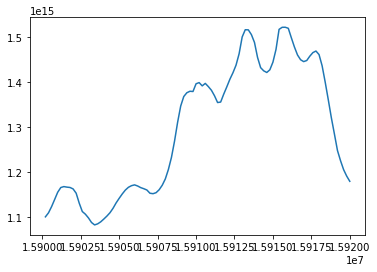

In [6]:
plt.plot(picked_0.t_step,picked_0.inertia_pol.isel(radius_ID=350).squeeze()**2)

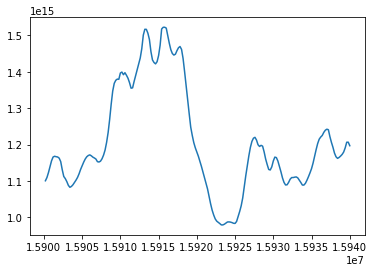

In [8]:
plt.plot(picked_0_2.t_step,picked_0_2.inertia_pol.isel(radius_ID=350).squeeze()**2)

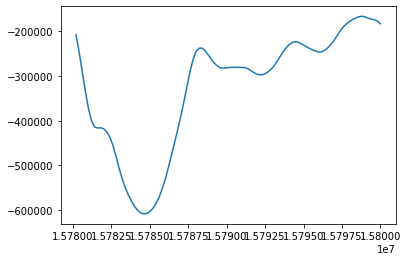

In [112]:
plt.plot(picked.t_step,picked.inertia_pol.sel(radius_ID=355,degree=3,order=3).squeeze())

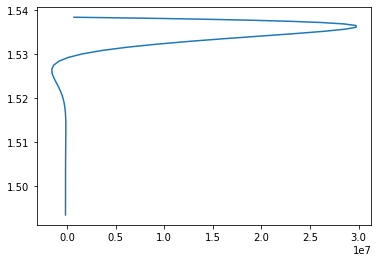

In [102]:
plt.plot(picked_0.inertia_pol.isel(t_step=-1,radius_ID=slice(-50,-1)).squeeze(),picked_0.radius.isel(radius_ID=slice(-50,-1)))

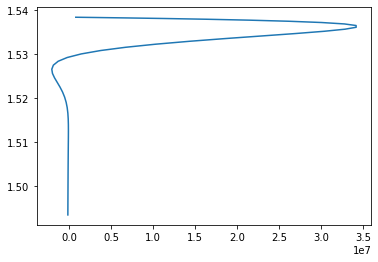

In [18]:
plt.plot(picked_0_2.inertia_pol.isel(t_step=100,radius_ID=slice(-50,-1)).squeeze(),picked_0_2.radius.isel(radius_ID=slice(-50,-1)))

# Functions

In [3]:
# number of time steps corresponding to 20 years
def ntsteps_to_years(n):
    L=2270e3
    pm=0.5
    eta=0.8
    return n*(L**2/eta/pm/86400/365.25 * 1e-7)

def years_to_ntsteps(y):
    L=2270e3
    pm=0.5
    eta=0.8
    return y/(L**2/(eta*pm)/86400/365.25 * 1e-7)

In [4]:
def index_of_lat(y,lat):
    return np.argmin((np.arcsin(y)*180/np.pi-lat)**2)

In [5]:
def fft_cos_sin(x,axis=-1):
    """ Returns the sine/cos transform of an array. Works the same as rfft, except it returns two arrays, 
    one corresponding to cosine terms of the fourier transform and the other to the sine terms
    such that x_m = sum(k=0 to N2) c_k cos(m*k*pi/Nz) + s_k sin(m*k*pi/Nz)
    Note that the lengths of the sine terms is one less than the cosines"""
    rfft = np.fft.rfft(x,axis=axis)
    Nz=x.shape[axis]
    N2=rfft.shape[axis]
    if N2%2==1:
        factor = np.array([1]+[2]*(N2-1)).reshape([1]*(axis%x.ndim)+[N2]+[1]*((-axis-1)%x.ndim))
        return factor*np.real(rfft)/Nz, 2*np.take(-np.imag(rfft),range(1,N2),axis=axis)/Nz
    else:
        factor_cos = np.array([1]+[2]*(N2-2)+[1]).reshape([1]*(axis%x.ndim)+[N2]+[1]*((-axis-1)%x.ndim))
        factor_sin = np.array([2]*(N2-2)+[1]).reshape([1]*(axis%x.ndim)+[N2-1]+[1]*((-axis-1)%x.ndim))
        return factor_cos*np.real(rfft)/Nz, factor_sin*np.take(-np.imag(rfft),range(1,N2),axis=axis)/Nz
        

In [6]:
def put_at(inds, axis=-1, slc=(slice(None),)): 
    return (axis<0)*(Ellipsis,) + axis*slc + (inds,) + (-1-axis)*slc 

def fft_halfrange_sin(x,axis=-1):
    """ Returns the sine transform of an array on half range (look up 'half range fourier series'). Works the same fft, except it returns one array, 
    corresponding to the terms of the half range sine transform
    such that x_m = sum(k=1 to N-1) s_k sin(m*k*pi/N)
    """
    N=x.shape[axis]
    x2 = np.concatenate([x,-np.flip(x,axis=axis)],axis=axis)
    fft = np.fft.fft(x2,axis=axis)
    sineterms = 1j*(np.take(fft,range(1,N+1),axis=axis)-np.take(fft,range(2*N-1,N-1,-1),axis=axis))
    sineterms[put_at(N-1,axis=axis)] = 1j*np.take(fft,N,axis=axis)
    return sineterms/2/N

def fft_halfrange_cos(x,axis=-1):
    """ Returns the cosine transform of an array on half range (look up 'half range fourier series'). Works the same fft, except it returns one array, 
    corresponding to the terms of the half range cosine transform
    such that x_m = sum(k=0 to N-1) c_k cos(m*k*pi/N)
    Note that the length is one more than the input
    """
    N=x.shape[axis]
    x2 = np.concatenate([x,np.flip(x,axis=axis)],axis=axis)
    fft = np.fft.fft(x2,axis=axis)
    cosineterms = (np.take(fft,range(1,N+1),axis=axis)+np.take(fft,range(2*N-1,N-1,-1),axis=axis))
    cosineterms[put_at(N-1,axis=axis)] = np.take(fft,N,axis=axis)
    cosineterms=np.concatenate([np.take(fft,[0.],axis=axis),cosineterms],axis=axis)
    return cosineterms/2/N


In [6]:
## Transform .dat file (coords = time,radius,degree) into netcdf 
#%time heat_advect = dat_to_xarray("data/data808/picked_mode_heatadvectonly_100r.dat")
#heat_advect.to_netcdf("data/data808/heat_advect.nc")
def interp_scalar(name, ngrid,spacing):
    """Transform coords from (time,radius,degree) to (time,radius,y=cos(latitude))"""
    y=sety(ngrid,spacing)
    scalar = xr.open_dataarray("data/data808/%s.nc"%name)
    scalar_y_ar=[]
    for i in scalar.t_step:
        scalar_y_ar.append(scalar_ycomplex_fixedm(y,scalar.sel(t_step=i).squeeze(),3))
    scalar_y_ar=np.array(scalar_y_ar)
    
    scalar_y = xr.DataArray(scalar_y_ar, 
                                 coords= {
                                     "t_step":scalar.t_step,
                                     "radius_ID":scalar.radius_ID,
                                     "y":y,
                                     "time":("t_step",scalar.time),
                                     "radius":("radius_ID",scalar.radius),
                                 },
                                 dims=["t_step", "radius_ID","y"])
    scalar_y=xr.merge([np.real(scalar_y).rename("%s_real"%name),np.imag(scalar_y).rename("%s_imag"%name)])
    
    scalar_y.to_netcdf("data/data808/%s_y_%i_%s.nc"%(name,ngrid,spacing))
    

In [8]:
def interp_3Dforcing(name,ngrid,spacing):
    """Transform coords from (time,radius,degree) to (time,radius,y=cos(latitude)) and components from tor,pol,dpoldr to r,theta,phi"""
    y=sety(ngrid,spacing)
    forcings = xr.open_dataset("data/data808/inertia_lorentz.nc")
    forcing_y_r_ar=[]
    forcing_y_theta_ar=[]
    forcing_y_phi_ar=[]
    for i in forcings.t_step:
        r=pol_to_r_ycomplex_fixedm(y,forcings[name+'_pol'].sel(t_step=i).squeeze(),3)
        theta,phi=torpol_to_thetaphi_ycomplex_fixedm(y,forcings[name+'_tor'].sel(t_step=i).squeeze(),forcings[name+'_pol_dr'].sel(t_step=i).squeeze(),3)
        forcing_y_r_ar.append(r)
        forcing_y_theta_ar.append(theta)
        forcing_y_phi_ar.append(phi)
    forcing_y_r_ar    =np.array(forcing_y_r_ar    )
    forcing_y_theta_ar=np.array(forcing_y_theta_ar)
    forcing_y_phi_ar  =np.array(forcing_y_phi_ar  )
    
    
    forcing_y = xr.Dataset({name+'_r_real':(["t_step","radius_ID","y"],np.real(forcing_y_r_ar)),
                            name+'_r_imag':(["t_step","radius_ID","y"],np.imag(forcing_y_r_ar)),
                            name+'_theta_real':(["t_step","radius_ID","y"],np.real(forcing_y_theta_ar)),
                            name+'_theta_imag':(["t_step","radius_ID","y"],np.imag(forcing_y_theta_ar)),
                            name+'_phi_real':(["t_step","radius_ID","y"],np.real(forcing_y_phi_ar)),
                            name+'_phi_imag':(["t_step","radius_ID","y"],np.imag(forcing_y_phi_ar))
                           }, 
                            coords= {
                                "t_step":forcings.t_step,
                                "radius_ID":forcings.radius_ID,
                                "y":y,
                                "time":("t_step",forcings.time),
                                "radius":("radius_ID",forcings.radius),
                            })

    forcing_y.to_netcdf("data/data808/%s_y_%i_%s.nc"%(name,ngrid,spacing))

In [32]:
def setyA(ngrid,m,M,spacing='linear',npoints=7):
    """ Sets matrix A of the eigenvalue problem (A - C*In)x = 0"""
    y  = sety(ngrid,spacing)
    if spacing =='linear':
        D2 = secondDerivative(y)
    else:
        D2 = make_D_fornberg(y,2,npoints=npoints)
    
    L1 = -np.dot(np.diag(M*(1-y**2)/(y**2)), D2) + np.diag(M*(m**2-1)/(y**2 * (1-y**2)))

    L2 = -np.diag(m/(y**2))
    
    A=np.block([[np.zeros((ngrid,ngrid)),np.eye(ngrid)],[L1,L2]])
    A[ngrid] = np.zeros(len(A))
    A[-1] = np.zeros(len(A))
    A[ngrid,0]=np.abs(A[ngrid+1,0])
    A[-1,ngrid-1]=np.abs(A[ngrid+1,0])
    
    return y,A


def responseForcing(ngrid,C,m,M,Fr,Ftheta,Flambda,adaptchi=True,Cref=0,chiref=0,spacing='linear',npoints=7):
    y,A=setyA(ngrid,m,M,spacing,npoints=npoints)
    if adaptchi :
        if Cref == 0:
            raise ValueError("Please provide non-zero reference C / reference chi if using adaptive dissipation")
        chinew = 1 + (chiref-1)*Cref/C
        M = M*chiref/chinew
        ngrid=len(y)
        y,A=setyA(ngrid,m,M,spacing)
        A = sps.csc_matrix(A)
    
    if spacing =='linear':
        D1 = firstDerivative(y)
    else:
        D1 = make_D_fornberg(y,1,npoints=npoints)
    
    forcingr = m**2/(M*(1-y**2)**0.5) * np.dot(D1,Fr) - ( (C*m/M + 2)*y*Fr 
                                                            + m*m/(M*(1-y**2)**(0.5)) * np.dot(D1,Fr*(1-y**2)**(0.5)) 
                                                           )
    forcingtheta = m**2/(M*(1-y**2)) * Ftheta
    forcinglambda = -1j* ( (C/M + 2/m)*y*Flambda 
                          + m/(M*(1-y**2)**(0.5)) * np.dot(D1,Flambda*(1-y**2)**(0.5)) 
                         )
    rhs = np.concatenate([np.zeros(ngrid),-M*(1-y**2)/y**2*(forcingtheta+forcinglambda+forcingr)])

    return -M*(1-y**2)/y**2*forcingr,-M*(1-y**2)/y**2*forcingtheta,-M*(1-y**2)/y**2*forcinglambda,spsl.spsolve(A-C*sps.eye(2*ngrid),rhs)[:ngrid]/(1-y**2)

def responseBuoyancy(ngrid,period,j,fixedparams,heat_advect_tilda,spacing='linear',npoints=7):
    m,E,Pm,Rastar,Omega,Hprime,Nprime,Brprime=fixedparams
    sectoyear = 365.25 * 24 * 60 * 60
    
    kprime = 2*np.pi*j/Hprime
    omegaprime = 2*np.pi / (period*sectoyear) / Omega / E 
    
    C0 = 2/0.65**2 /E * kprime**2/Nprime**2
    C = C0*omegaprime
    
    chi = 1 +1j*kprime**2/omegaprime/Pm
    M = 1/(E*Pm*0.65**2)*Brprime*kprime**4/(chi*Nprime**2)

    G_r = (Rastar/E * Brprime * kprime**2)/ (0.65*1j*omegaprime*chi*Nprime**2)
    
    Fr = G_r*heat_advect_tilda[int(800*25/years_to_ntsteps(-period)),j-1,:]
    
    forcingr,_,_,by= responseForcing(ngrid,C,m,M,Fr,0.,0.,adaptchi=True,Cref=C,chiref=chi,spacing=spacing,npoints=npoints)
    return forcingr,by

def responseLorentz(ngrid,period,j,fixedparams,forcing_r_tilda,forcing_theta_tilda,forcing_phi_tilda,spacing='linear',npoints=7):
    m,E,Pm,Rastar,Omega,Hprime,Nprime,Brprime=fixedparams
    sectoyear = 365.25 * 24 * 60 * 60
    
    kprime = 2*np.pi*j/Hprime
    omegaprime = 2*np.pi / (period*sectoyear) / Omega / E 
    
    C0 = 2/0.65**2 /E * kprime**2/Nprime**2
    C = C0*omegaprime
    
    chi = 1 +1j*kprime**2/omegaprime/Pm
    M = 1/(E*Pm*0.65**2)*Brprime*kprime**4/(chi*Nprime**2)
    
    G_h = 1/E/Pm * Brprime * kprime**3/(0.65**2*chi*Nprime**2)
    G_r = G_h*0.65/kprime
    Fr = G_r*forcing_r_tilda[int(800*25/years_to_ntsteps(-period)),j-1,:]
    Ftheta = G_h*forcing_theta_tilda[int(800*25/years_to_ntsteps(-period)),j-1,:]
    Fphi = G_h*forcing_phi_tilda[int(800*25/years_to_ntsteps(-period)),j-1,:]
    
    return responseForcing(ngrid,C,m,M,Fr,Ftheta,Fphi,adaptchi=True,Cref=C,chiref=chi,spacing=spacing,npoints=npoints)

def transformForcing(forcing,transformtype):
    """BE CAREFUL THAT THE FFT IN TIME IS NOT PERFORMED THE RIGHT WAY (should be F=sum(F_hat e^{-1j*omega*t}), and here it is  F=sum(F_hat e^{+1j*omega*t}))"""
    #Focus on stratified layer
    forcing_layer = forcing[:,42:]
    
    #Define a few constants
    r_cheb = np.array(forcing_layer.radius)
    r_lin = np.linspace(r_cheb[0],r_cheb[-1],len(r_cheb))
    Nz=len(r_cheb)
    Nt=len(forcing_layer.t_step)
    
    #Here we subtract the affine part of the forcing, that doesn't contribute because what ultimately forces the wave is the second derivative (or third). This helps have smooth Fourier transforms in the subsequent decomposition
    forcing_layer_periodic = forcing_layer - forcing_layer.isel(radius_ID=-1) - (forcing_layer.radius-forcing_layer.radius[-1])*(forcing_layer.isel(radius_ID=0)-forcing_layer.isel(radius_ID=-1))/(forcing_layer.radius[0]-forcing_layer.radius[-1])
    
    #Interpolate on constant r grid & perform the half range fft
    f = interpolate.interp1d(r_cheb, np.array(forcing_layer_periodic),axis=1)
    forcing_layer_rinterp = f(r_lin)
    if transformtype == "sin":
        forcing_layer_hft=fft_halfrange_sin(np.array(forcing_layer_rinterp),axis=1)
    elif transformtype == "cos":
        forcing_layer_hft=fft_halfrange_cos(np.array(forcing_layer_rinterp),axis=1)[:,1:]
    else :
        raise ValueError("transformtype must be one of ('sin','cos')")
    
    # Perform temporal fft
    forcing_layer_hft_tft = np.fft.fft(forcing_layer_hft,axis=0)/Nt #shape Nt,Nz,Ny
    return forcing_layer_hft_tft

# Analyzing the heat advection term

In [10]:
print(years_to_ntsteps(20))
print(ntsteps_to_years(25))

489.93925750548243
1.020534673105686


In [97]:
#%time interp_scalar('heat_advect',150,'cos')

CPU times: user 1min 41s, sys: 1min 10s, total: 2min 52s
Wall time: 3min 2s


In [3]:
## Transform .dat file (coords = time,radius,degree) into netcdf 
#%time temperature = dat_to_xarray("data/data808/picked_mode_temperatureonly_100r.dat")
#temperature.to_netcdf("data/data808/temperature.nc")

CPU times: user 26.5 s, sys: 9.3 s, total: 35.8 s
Wall time: 39.9 s


In [7]:
%time interp_scalar('temperature',300,'cos')

CPU times: user 3min 27s, sys: 2min 36s, total: 6min 3s
Wall time: 6min 21s


In [9]:
xr.open_dataset("data/data808/temperature.nc")

<xarray.Dataset>
Dimensions:      (degree: 253, order: 1, radius_ID: 100, t_step: 800)
Coordinates:
  * t_step       (t_step) int64 16160025 16160050 16160075 ... 16179975 16180000
  * radius_ID    (radius_ID) int64 261 262 263 264 265 ... 356 357 358 359 361
  * degree       (degree) int64 3 4 5 6 7 8 9 10 ... 249 250 251 252 253 254 255
  * order        (order) int64 3
    time         (t_step) float64 ...
    radius       (radius_ID) float64 ...
Data variables:
    temperature  (t_step, radius_ID, degree, order) float64 ...

In [11]:
heat_advect_y = xr.open_dataset("data/data808/heat_advect_y_300_cos.nc")
heat_advect_y=heat_advect_y.heat_advect_real

In [99]:
heat_advect_y_150 = xr.open_dataset("data/data808/heat_advect_y_150_cos.nc")
heat_advect_y_150=heat_advect_y_150.heat_advect_real

## Temporal spectrum

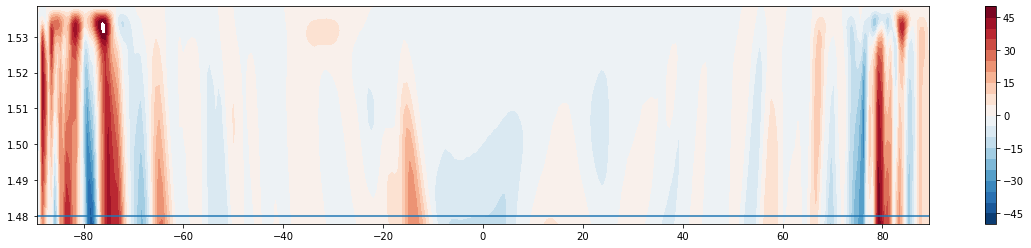

In [100]:
fig,ax=plt.subplots(1,1,figsize=(20,4))

cf=ax.contourf(np.arcsin(y)*180/np.pi,heat_advect_y.radius[42:],heat_advect_y[0,42:],levels=np.arange(-50,51,5),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax)
ax.axhline(1.48)
    



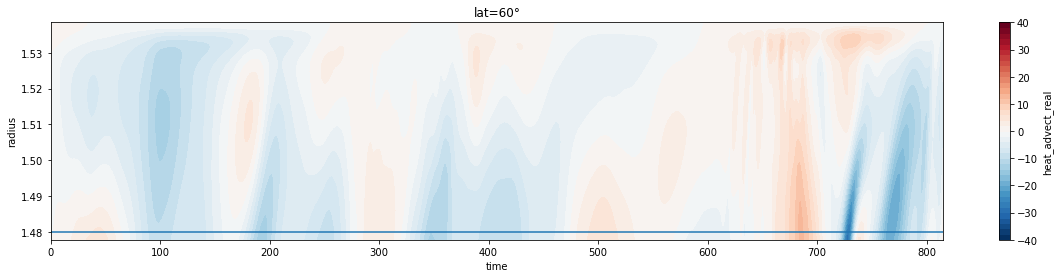

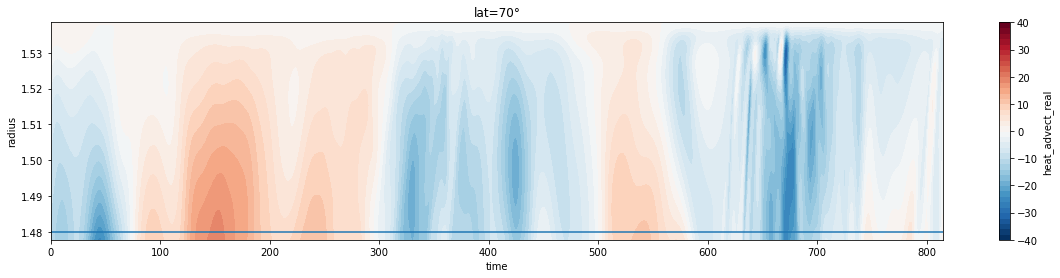

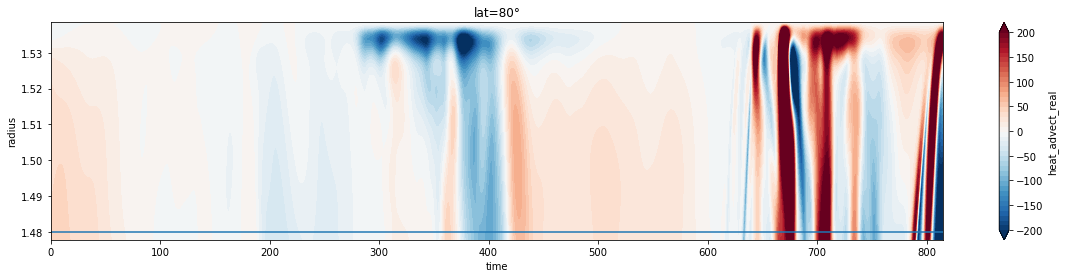

In [101]:
def plot_hov(lat,vmax=40):
    heat_advect_y0 = heat_advect_y.isel(y=index_of_lat(y,lat))
    temp = heat_advect_y0[:,42:]
    heat_advect_y0_plot=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})
    
    fig,ax=plt.subplots(1,1,figsize=(20,4))
    
    heat_advect_y0_plot.plot.contourf(ax=ax,x='time',levels=np.linspace(-vmax,vmax,41),cmap=plt.cm.RdBu_r)
    ax.axhline(1.48)
    ax.set_title('lat=%i°'%lat)
    
plot_hov(60)
plot_hov(70)
plot_hov(80,vmax=200)

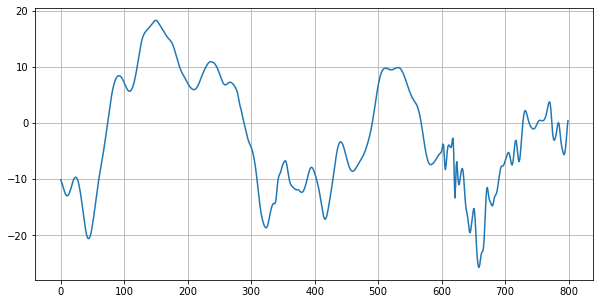

In [103]:
temp = heat_advect_y.isel(y=index_of_lat(y,70))[:,42:]
heat_advect_y70_plot=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(heat_advect_y70_plot[:,3])
ax.grid()

## radial sine transform then temporal transform, for a fixed y

In [104]:
temp = heat_advect_y.isel(y=index_of_lat(y,70))[:,42:]
heat_advect_y70_plot=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})


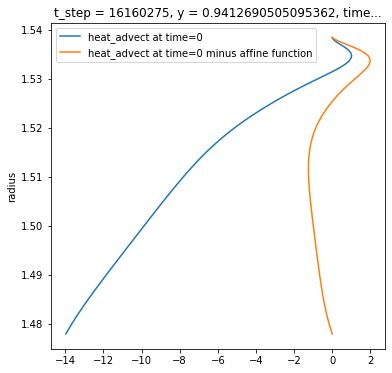

In [105]:
#Here we substract the affine part of the forcing, that doesn't contribute because what ultimately forces the wave is the second derivative (or third). This helps have smooth Fourier transforms in the subsequent decomposition
time=10
fig,ax=plt.subplots(1,1,figsize=(6,6))
heat_advect_y70_plot[time].plot(y='radius',label='heat_advect at time=0')

heat_advect_y70_plot_periodic = heat_advect_y70_plot - heat_advect_y70_plot.isel(radius=-1) - (heat_advect_y70_plot.radius-heat_advect_y70_plot.radius[-1])*(heat_advect_y70_plot.isel(radius=0)-heat_advect_y70_plot.isel(radius=-1))/(heat_advect_y70_plot.radius[0]-heat_advect_y70_plot.radius[-1])

heat_advect_y70_plot_periodic[time].plot(y='radius',label='heat_advect at time=0 minus affine function')

ax.legend()

In [110]:
r_cheb = np.array(heat_advect_y70_plot_periodic.radius)
r_lin = np.linspace(r_cheb[0],r_cheb[-1],len(r_cheb))
Nz=len(r_cheb)
Nt=len(heat_advect_y70_plot_periodic.t_step)
f = interpolate.interp1d(r_cheb, np.array(heat_advect_y70_plot_periodic),axis=1)
heat_advect_y70_rinterp = f(r_lin)
heat_advect_y70_hftsin=np.real(fft_halfrange_sin(np.array(heat_advect_y70_rinterp),axis=1))

In [111]:

nz = np.arange(0,Nz,1)[None,None,:]
j = np.arange(1,Nz+1,1)[None,:,None]
heat_advect_y70_hftsin_decomp = (heat_advect_y70_hftsin[:,:,None]*np.sin(nz*j*np.pi/Nz))

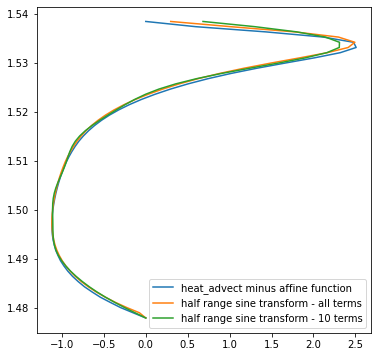

In [112]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
time=15

ax.plot(heat_advect_y70_rinterp[time],r_lin,label="heat_advect minus affine function")
ax.plot(heat_advect_y70_hftsin_decomp.sum(axis=1)[time],r_lin,label="half range sine transform - all terms")
ax.plot(heat_advect_y70_hftsin_decomp[:,:10].sum(axis=1)[time],r_lin,label="half range sine transform - 10 terms")

ax.legend()

In a first step we've decomposed the forcing as such :
$F(y,t,z) = az+b+ \displaystyle\sum_{j=1}^{N_z} \hat F_j(y,t) \sin\left(\pi jz/H\right)$

And we discard the affine part :
$F_s(y,t,z) = \displaystyle\sum_{j=1}^{N_z} \hat F_j(y,t) \sin\left(\pi jz/H\right)$

We now look one by one into the sine components:
$\hat F_j(y,t) = \displaystyle\sum_{l=0}^{N_t-1}\tilde F_j(y,l) e^{2\pi il t/T} = \displaystyle\sum_{l=0}^{N_t-1}\tilde F_j(y,\omega_l) e^{i\omega_lt}$ with $\omega_l = 2\pi l/T$

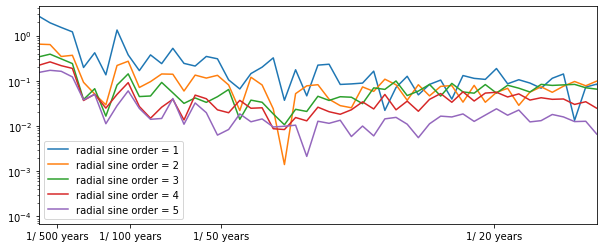

In [113]:
fig,ax=plt.subplots(1,1,figsize=(10,4))
for i in range(5):
    ax.plot(np.abs(np.fft.fft(heat_advect_y70_hftsin[:,i])/Nt),label='radial sine order = %i'%(i+1))
ax.set_xlim(0,50)
ax.set_yscale('log')
xtickslabs=np.array([20,50,100,500])
ax.set_xticks(800*25/years_to_ntsteps(xtickslabs))
xtickslabs=['1/ %i years'%x for x in xtickslabs]
ax.set_xticklabels(xtickslabs);None
ax.legend()



## radial sine transform then temporal transform, for all y

In [114]:
#Focus on stratified layer
temp = heat_advect_y[:,42:]
heat_advect_y2=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})

#Define a few constants
r_cheb = np.array(heat_advect_y2.radius)
r_lin = np.linspace(r_cheb[0],r_cheb[-1],len(r_cheb))
Nz=len(r_cheb)
Nt=len(heat_advect_y2.t_step)

#Here we substract the affine part of the forcing, that doesn't contribute because what ultimately forces the wave is the second derivative (or third). This helps have smooth Fourier transforms in the subsequent decomposition
heat_advect_y2_periodic = heat_advect_y2 - heat_advect_y2.isel(radius=-1) - (heat_advect_y2.radius-heat_advect_y2.radius[-1])*(heat_advect_y2.isel(radius=0)-heat_advect_y2.isel(radius=-1))/(heat_advect_y2.radius[0]-heat_advect_y2.radius[-1])

#Interpolate on constant r grid & perform the sine hft
f = interpolate.interp1d(r_cheb, np.array(heat_advect_y2_periodic),axis=1)
heat_advect_y2_rinterp = f(r_lin)
heat_advect_y2_hftsin=np.real(fft_halfrange_sin(np.array(heat_advect_y2_rinterp),axis=1))

# Perform temporal fft
heat_advect_y2_hftsin_tft = np.fft.fft(heat_advect_y2_hftsin,axis=0)/Nt #shape Nt,Nz,Ny

In [115]:
nz = np.arange(0,Nz,1)[None,None,:,None]
j = np.arange(1,Nz+1,1)[None,:,None,None]
heat_advect_y2_hftsin_decomp = (heat_advect_y2_hftsin[:,:,None,:]*np.sin(nz*j*np.pi/Nz))

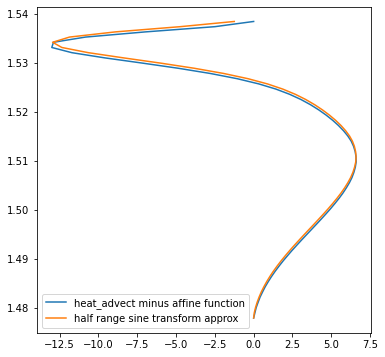

In [116]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
time=15;lat=280

ax.plot(heat_advect_y2_rinterp[time,:,lat],r_lin,label="heat_advect minus affine function")

ax.plot(heat_advect_y2_hftsin_decomp[time,:,:,lat].sum(axis=0),r_lin,label="half range sine transform approx")
ax.legend()

We now explore the dependence of $\tilde F_j(y,\omega_l)$ on both $y$ and $j$

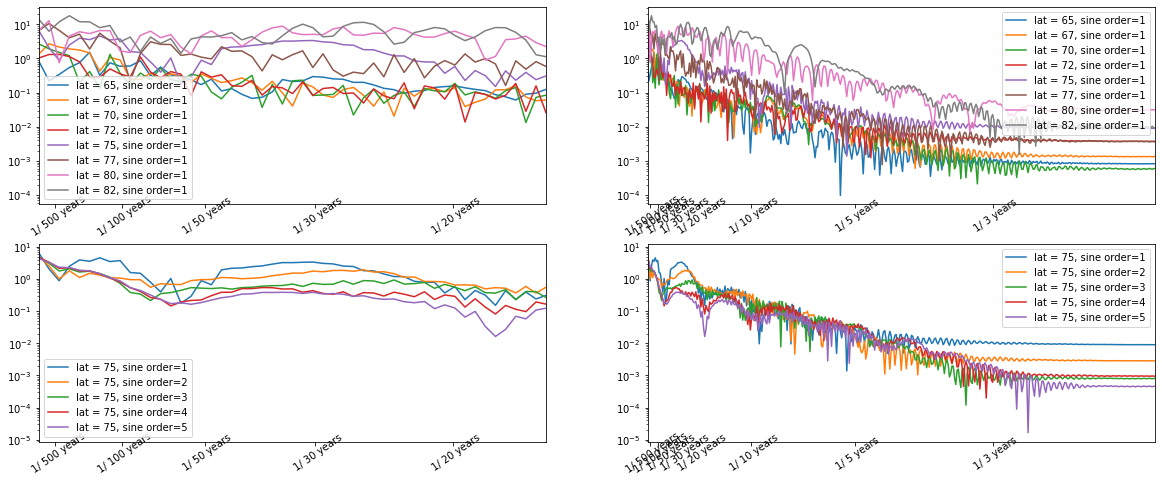

In [117]:
def setlabels(ax,lim):
    ax.set_xlim(0,lim)
    ax.set_yscale('log')
    xtickslabs=np.array([1,2,3,5,10,20,30,50,100,500])
    xtickslabs=xtickslabs[np.where(xtickslabs>=800*25/years_to_ntsteps(lim))]
    ax.set_xticks(800*25/years_to_ntsteps(xtickslabs))
    xtickslabs=['1/ %i years'%x for x in xtickslabs]
    ax.set_xticklabels(xtickslabs,rotation=35,rotation_mode='anchor')
    ax.legend()
    

fig,axx=plt.subplots(2,2,figsize=(20,8))
ax,ax2=axx[0]
for i in np.arange(65,85,2.5):
    ax.plot( np.abs(heat_advect_y2_hftsin_tft[:,0,index_of_lat(y,i)]),label='lat = %i, sine order=1'%i)
    ax2.plot(np.abs(heat_advect_y2_hftsin_tft[:,0,index_of_lat(y,i)]),label='lat = %i, sine order=1'%i)
setlabels(ax,50)
setlabels(ax2,400)

ax,ax2=axx[1]
for i in range(5):
    ax.plot( np.abs(heat_advect_y2_hftsin_tft[:,i,index_of_lat(y,75)]),label='lat = 75, sine order=%i'%(i+1))
    ax2.plot(np.abs(heat_advect_y2_hftsin_tft[:,i,index_of_lat(y,75)]),label='lat = 75, sine order=%i'%(i+1))
setlabels(ax,50)
setlabels(ax2,400)

# Analyzing the Lorentz term

In [423]:
## Transform .dat file (coords = time,radius,degree) into netcdf 
#%time forcings = dat_to_xarray("data/data808/picked_mode_forcingsonly_100r_808.dat")
#forcings.to_netcdf("data/data808/inertia_lorentz.nc")

CPU times: user 49.7 s, sys: 19.5 s, total: 1min 9s
Wall time: 1min 20s


In [23]:
#%time interp_3Dforcing('inertia',300,'cos')

CPU times: user 9min 33s, sys: 6min 57s, total: 16min 31s
Wall time: 18min 11s


In [24]:
#%time interp_3Dforcing('Lorentz_force',300,'cos')

CPU times: user 9min 14s, sys: 6min 48s, total: 16min 2s
Wall time: 16min 54s


In [36]:
lorentz = xr.open_dataset("data/data808/Lorentz_force_y_300_cos.nc")
lorentz_theta = lorentz.Lorentz_force_theta_real+1j*lorentz.Lorentz_force_theta_imag

## Temporal spectrum

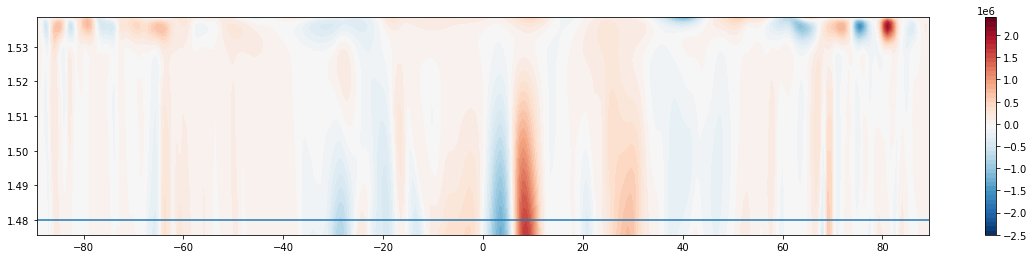

In [53]:
fig,ax=plt.subplots(1,1,figsize=(20,4))

cf=ax.contourf(np.arcsin(y)*180/np.pi,lorentz_theta.radius[42:],np.real(lorentz_theta[0,42:]),levels=np.arange(-2.5e6,2.5e6,0.1e6),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax)
ax.axhline(1.48)
    



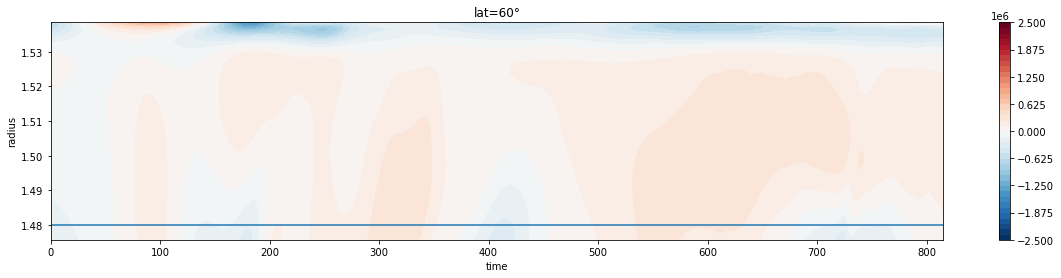

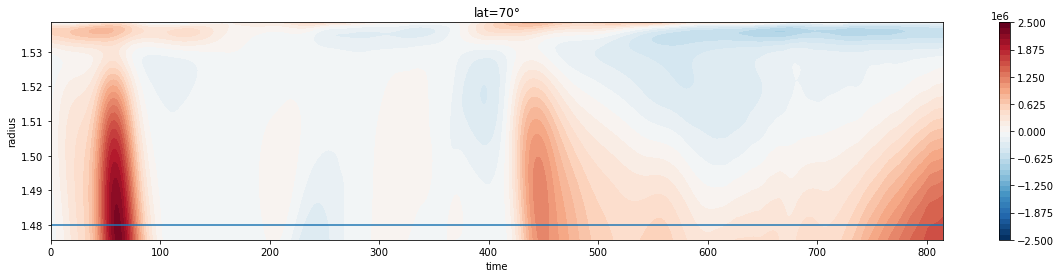

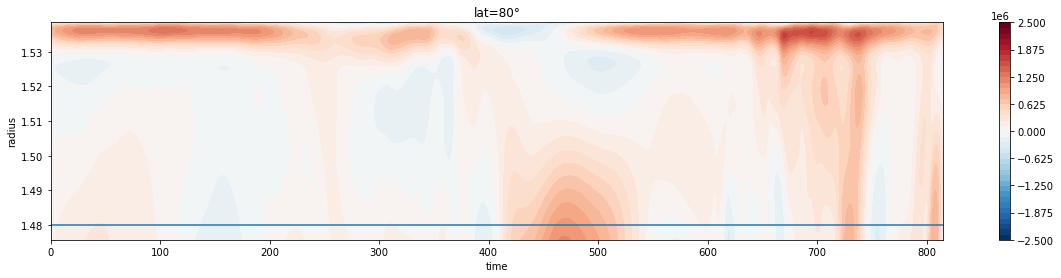

In [55]:
def plot_hov(lat,vmax=2.5e6):
    lorentz_theta_y0 = lorentz_theta.isel(y=index_of_lat(y,lat))
    temp = np.real(lorentz_theta_y0[:,42:])
    lorentz_theta_y0_plot=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})
    
    fig,ax=plt.subplots(1,1,figsize=(20,4))
    
    lorentz_theta_y0_plot.plot.contourf(ax=ax,x='time',levels=np.linspace(-vmax,vmax,41),cmap=plt.cm.RdBu_r)
    ax.axhline(1.48)
    ax.set_title('lat=%i°'%lat)
    
plot_hov(60)
plot_hov(70)
plot_hov(80)

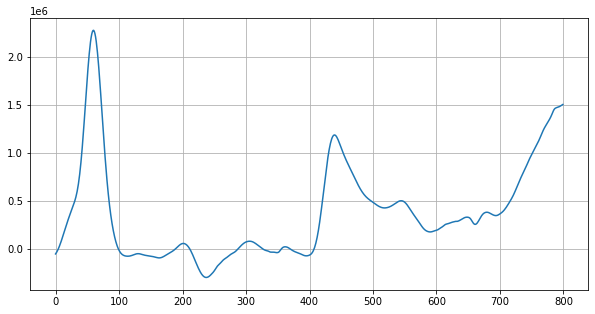

In [62]:
temp = lorentz_theta.isel(y=index_of_lat(y,70))[:,42:]
lorentz_theta_70_plot=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(np.real(lorentz_theta_70_plot[:,3]))
ax.grid()

## radial cosine transform then temporal transform, for all y

In [78]:
#Focus on stratified layer
temp = lorentz_theta[:,42:]
lorentz_theta2=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})

#Define a few constants
r_cheb = np.array(lorentz_theta2.radius)
r_lin = np.linspace(r_cheb[0],r_cheb[-1],len(r_cheb))
Nz=len(r_cheb)
Nt=len(lorentz_theta2.t_step)

#Here we substract the affine part of the forcing, that doesn't contribute because what ultimately forces the wave is the second derivative (or third). This helps have smooth Fourier transforms in the subsequent decomposition
lorentz_theta2_periodic = lorentz_theta2 - lorentz_theta2.isel(radius=-1) - (lorentz_theta2.radius-lorentz_theta2.radius[-1])*(lorentz_theta2.isel(radius=0)-lorentz_theta2.isel(radius=-1))/(lorentz_theta2.radius[0]-lorentz_theta2.radius[-1])

#Interpolate on constant r grid & perform the sine hft
f = interpolate.interp1d(r_cheb, np.array(lorentz_theta2_periodic),axis=1)
lorentz_theta2_rinterp = f(r_lin)
lorentz_theta2_hftcos=np.real(fft_halfrange_cos(np.array(lorentz_theta2_rinterp),axis=1))

# Perform temporal fft
lorentz_theta2_hftcos_tft = np.fft.fft(lorentz_theta2_hftcos,axis=0)/Nt #shape Nt,Nz,Ny

In [80]:
nz = np.arange(0,Nz,1)[None,None,:,None]
j = np.arange(0,Nz+1,1)[None,:,None,None]
lorentz_theta2_hftcos_decomp = (lorentz_theta2_hftcos[:,:,None,:]*np.cos(nz*j*np.pi/Nz))

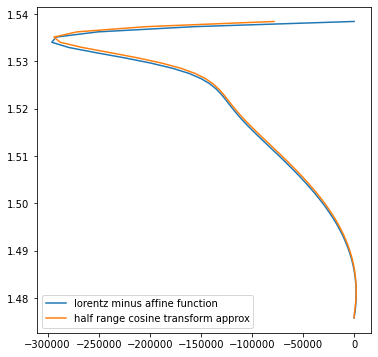

In [82]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
time=15;lat=280

ax.plot(np.real(lorentz_theta2_rinterp[time,:,lat]                    ),r_lin,label="lorentz minus affine function")
ax.plot(np.real(lorentz_theta2_hftcos_decomp[time,:,:,lat].sum(axis=0)),r_lin,label="half range cosine transform approx")
ax.legend()

We now explore the dependence of $\tilde F_j(y,\omega_l)$ on both $y$ and $j$

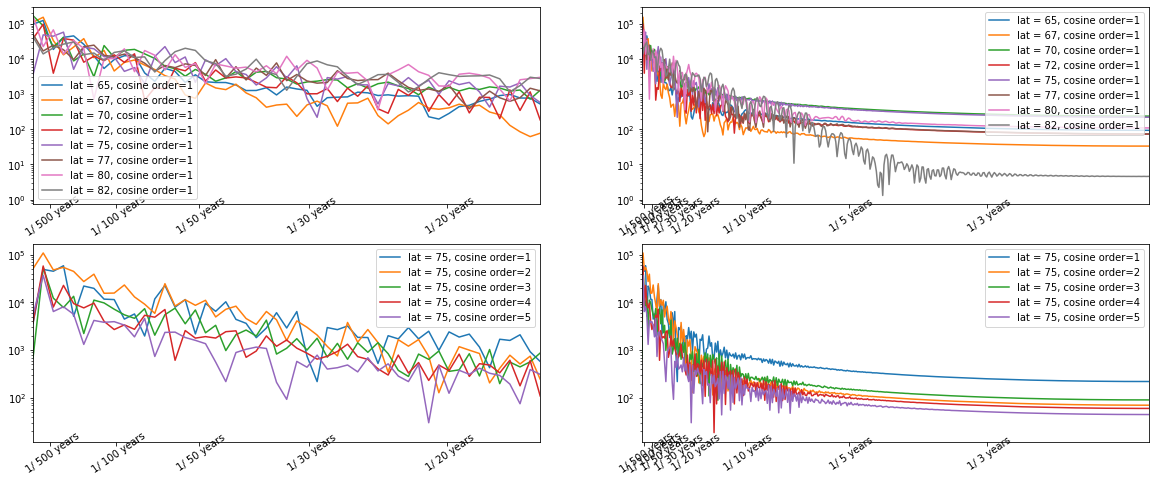

In [84]:
def setlabels(ax,lim):
    ax.set_xlim(0,lim)
    ax.set_yscale('log')
    xtickslabs=np.array([1,2,3,5,10,20,30,50,100,500])
    xtickslabs=xtickslabs[np.where(xtickslabs>=800*25/years_to_ntsteps(lim))]
    ax.set_xticks(800*25/years_to_ntsteps(xtickslabs))
    xtickslabs=['1/ %i years'%x for x in xtickslabs]
    ax.set_xticklabels(xtickslabs,rotation=35,rotation_mode='anchor')
    ax.legend()
    

fig,axx=plt.subplots(2,2,figsize=(20,8))
ax,ax2=axx[0]
for i in np.arange(65,85,2.5):
    ax.plot( np.abs(lorentz_theta2_hftcos_tft[:,1,index_of_lat(y,i)]),label='lat = %i, cosine order=1'%i)
    ax2.plot(np.abs(lorentz_theta2_hftcos_tft[:,1,index_of_lat(y,i)]),label='lat = %i, cosine order=1'%i)
setlabels(ax,50)
setlabels(ax2,400)

ax,ax2=axx[1]
for i in range(5):
    ax.plot( np.abs(lorentz_theta2_hftcos_tft[:,i+1,index_of_lat(y,75)]),label='lat = 75, cosine order=%i'%(i+1))
    ax2.plot(np.abs(lorentz_theta2_hftcos_tft[:,i+1,index_of_lat(y,75)]),label='lat = 75, cosine order=%i'%(i+1))
setlabels(ax,50)
setlabels(ax2,400)

# Full range vs half range Fourier series

let $f$ be a function defined on the interval $[-H,0]$. The classic way to decompose $f$ is the Fourier series; namely, $f$ is written as :

$f(z) = \displaystyle\sum_{n=-\infty}^{+\infty} a_n e^{i2\pi n z/H} = \displaystyle\sum_{n=0}^{+\infty} c_n \cos(2\pi n z/H)+\displaystyle\sum_{n=1}^{+\infty} s_n \sin(2\pi n z/H)$. E.g. below :

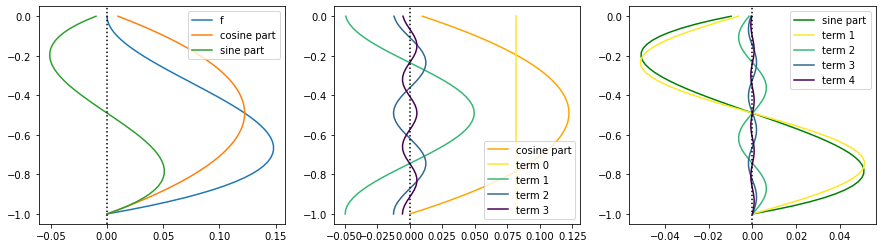

In [387]:
_,ax=plt.subplots(1,3,figsize=(15,4))

x = np.linspace(-1,0)
f=x**2+x**3
ax[0].plot(f,x,label='f')
ax[0].legend()
c,s=fft_cos_sin(f,axis=-1)
Nx=len(x)
nx = np.arange(0,Nx,1)[None,:]
jcos = np.arange(0,Nx//2+1,1)[:,None]
jsin = np.arange(1,Nx//2+1,1)[:,None]
fcos = (c[:,None]*np.cos(nx*jcos*2*np.pi/Nx))
fsin = (s[:,None]*np.sin(nx*jsin*2*np.pi/Nx))
ax[0].plot(fcos.sum(axis=0),x,label='cosine part')
ax[0].plot(fsin.sum(axis=0),x,label='sine part')

ax[1].plot(fcos.sum(axis=0),x,color='orange',label='cosine part')
ax[2].plot(fsin.sum(axis=0),x,color='green',label='sine part')
for i in range(4):
    ax[1].plot(fcos[i],x,color=plt.cm.get_cmap('viridis', 4)(3-i),label='term %i'%i)
    ax[2].plot(fsin[i],x,color=plt.cm.get_cmap('viridis', 4)(3-i),label='term %i'%(i+1))
for a in ax:
    a.axvline(0.,color='k',linestyle=':')
    a.legend()

However there are countless other ways to decompose $f$, and one of them is the half range Fourier series, which helps express $f$ as a sum of sines only, now with frequencies that are multiples of $\pi/H$ instead of $2\pi/H$ above :

$f(z) = \displaystyle\sum_{n=1}^{+\infty} S_n \sin(\pi n z/H)$

The idea is simply to define $\forall z \in [-H,H], f_2(z):=\left\{\begin{array}{ccl}f(z) &\mathrm{ if }& z\leq 0 \\ -f(-z) &\mathrm{ if }& z> 0\end{array}\right.$, whose classic Fourier transform will only contain sine terms because it is odd, and to restrict it to $[-H,0]$

In the same fashion, one can express $f$ as a sum of cosine terms only :

$f(z) = \displaystyle\sum_{n=0}^{+\infty} C_n \cos(\pi n z/H)$


In [379]:
x = np.linspace(-1,0)
f=x**2+x**3
sh=np.real(fft_halfrange_sin(f))
ch=np.real(fft_halfrange_cos(f))


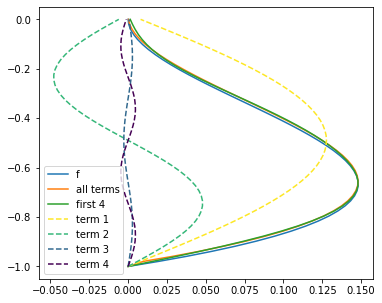

In [373]:
_,ax=plt.subplots(1,1,figsize=(6,5))

ax.plot(f,x,label='f')


Nx=len(x)
nx = np.arange(0,Nx,1)[None,:]
jsin = np.arange(1,Nx+1,1)[:,None]
fsinhalf = (sh[:,None]*np.sin(nx*jsin*np.pi/Nx))
ax.plot(fsinhalf.sum(axis=0),x,label='all terms')
ax.plot(fsinhalf[:4].sum(axis=0),x,label='first 4')

for i in range(4):
    ax.plot(fsinhalf[i],x,color=plt.cm.get_cmap('viridis', 4)(3-i),linestyle='--',label='term %i'%(i+1))
ax.legend()

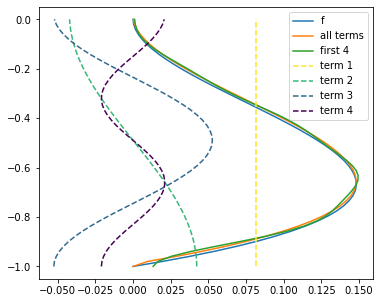

In [386]:
_,ax=plt.subplots(1,1,figsize=(6,5))
ax.plot(f,x,label='f')

Nx=len(x)
nx = np.arange(0,Nx,1)[None,:]
j = np.arange(0,Nx+1,1)[:,None]
fcoshalf = (ch[:,None]*np.cos(nx*j*np.pi/Nx))
ax.plot(fcoshalf.sum(axis=0),x,label='all terms')
ax.plot(fcoshalf[:10].sum(axis=0),x,label='first 4')

for i in range(4):
    ax.plot(fcoshalf[i],x,color=plt.cm.get_cmap('viridis', 4)(3-i),linestyle='--',label='term %i'%(i+1))
ax.legend()

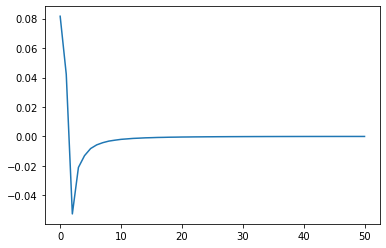

In [385]:
plt.plot(ch)

# Old stuff

## radial sine transform then temporal transform, for a fixed y

In [390]:
lorentz_theta_70 = heat_advect_y.isel(y=index_of_lat(y,70))
temp = heat_advect_y70[:,42:]
heat_advect_y70_plot=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})


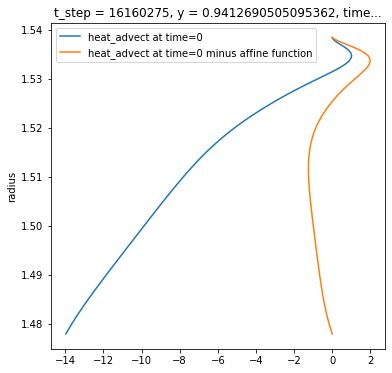

In [391]:
#Here we substract the affine part of the forcing, that doesn't contribute because what ultimately forces the wave is the second derivative (or third). This helps have smooth Fourier transforms in the subsequent decomposition
time=10
fig,ax=plt.subplots(1,1,figsize=(6,6))
heat_advect_y70_plot[time].plot(y='radius',label='heat_advect at time=0')

heat_advect_y70_plot_periodic = heat_advect_y70_plot - heat_advect_y70_plot.isel(radius=-1) - (heat_advect_y70_plot.radius-heat_advect_y70_plot.radius[-1])*(heat_advect_y70_plot.isel(radius=0)-heat_advect_y70_plot.isel(radius=-1))/(heat_advect_y70_plot.radius[0]-heat_advect_y70_plot.radius[-1])

heat_advect_y70_plot_periodic[time].plot(y='radius',label='heat_advect at time=0 minus affine function')

ax.legend()

In [392]:
r_cheb = np.array(heat_advect_y70_plot_periodic.radius)
r_lin = np.linspace(r_cheb[0],r_cheb[-1],len(r_cheb))
Nz=len(r_cheb)
Nt=len(heat_advect_y70_plot_periodic.t_step)
f = interpolate.interp1d(r_cheb, np.array(heat_advect_y70_plot_periodic),axis=1)
heat_advect_y70_rinterp = f(r_lin)


In [175]:
heat_advect_y70_rftcos,heat_advect_y70_rftsin=fft_cos_sin(np.array(heat_advect_y70_rinterp),axis=1)

In [176]:

nz = np.arange(0,Nz,1)[None,None,:]
jcos = np.arange(0,Nz//2+1,1)[None,:,None]
jsin = np.arange(1,Nz//2+1,1)[None,:,None]
heat_advect_y70_rcos = (heat_advect_y70_rftcos[:,:,None]*np.cos(nz*jcos*2*np.pi/Nz)).sum(axis=1)
heat_advect_y70_rsin = (heat_advect_y70_rftsin[:,:,None]*np.sin(nz*jsin*2*np.pi/Nz)).sum(axis=1)

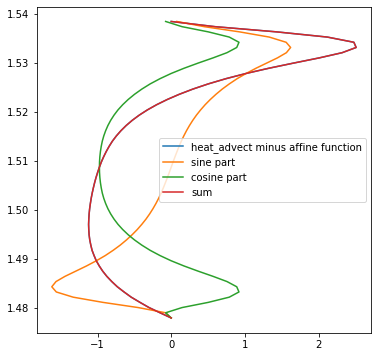

In [177]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
time=15

ax.plot(heat_advect_y70_rinterp[time],r_lin,label="heat_advect minus affine function")

ax.plot(heat_advect_y70_rsin[time],r_lin,label="sine part")
ax.plot(heat_advect_y70_rcos[time],r_lin,label="cosine part")

ax.plot(heat_advect_y70_rsin[time]+heat_advect_y70_rcos[time],r_lin,label="sum")

ax.legend()

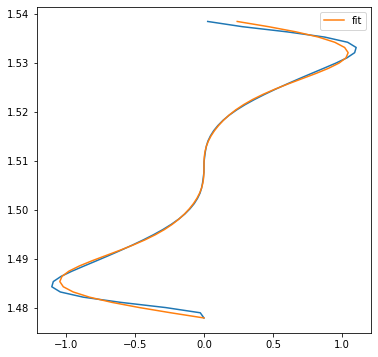

In [178]:
heat_advect_y70_rsin_all = (heat_advect_y70_rftsin[:,:,None]*np.sin(nz*jsin*2*np.pi/Nz))

fig,ax=plt.subplots(1,1,figsize=(6,6))
#for i in range(5):
#    ax.plot(heat_advect_y70_sin_all[0,i],r_lin,label="jz=%i"%i)
ax.plot(heat_advect_y70_rsin_all[0].sum(axis=0),r_lin)
ax.plot(heat_advect_y70_rsin_all[0][:4].sum(axis=0),r_lin,label='fit')
ax.legend()

In a first step we've decomposed the forcing as such :
$F(y,t,z) = az+b+ \displaystyle\sum_{j=0}^{N_z-1} \hat F_{c,j}(y,t) \cos\left(2\pi jz/H\right) + \displaystyle\sum_{j=0}^{N_z-1} \hat F_{s,j}(y,t) \sin\left(2\pi jz/H\right)$

And we only keep the sine part :
$F_s(y,t,z) = \displaystyle\sum_{j=0}^{N_z-1} \hat F_j(y,t) \sin\left(2\pi jz/H\right)$

We now look one by one into the sine components:
$\hat F_j(y,t) = \displaystyle\sum_{l=0}^{N_t-1}\tilde F_j(y,l) e^{2\pi il t/T} = \displaystyle\sum_{l=0}^{N_t-1}\tilde F_j(y,\omega_l) e^{i\omega_lt}$ with $\omega_l = 2\pi l/T$

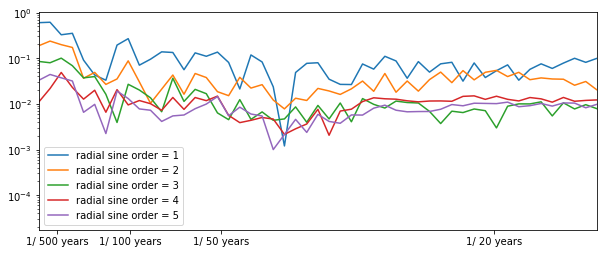

In [179]:
fig,ax=plt.subplots(1,1,figsize=(10,4))
for i in range(5):
    ax.plot(np.abs(np.fft.fft(heat_advect_y70_rftsin[:,i])/Nt),label='radial sine order = %i'%(i+1))
ax.set_xlim(0,50)
ax.set_yscale('log')
xtickslabs=np.array([20,50,100,500])
ax.set_xticks(800*25/years_to_ntsteps(xtickslabs))
xtickslabs=['1/ %i years'%x for x in xtickslabs]
ax.set_xticklabels(xtickslabs);None
ax.legend()

## radial sine transform then temporal transform, for all y

In [57]:
#Focus on stratified layer
temp = heat_advect_y[:,42:]
heat_advect_y2=temp.assign_coords(time = ntsteps_to_years(temp.t_step-temp.t_step[0])).swap_dims({'t_step':'time','radius_ID':'radius'})

#Define a few constants
r_cheb = np.array(heat_advect_y2.radius)
r_lin = np.linspace(r_cheb[0],r_cheb[-1],len(r_cheb))
Nz=len(r_cheb)
Nt=len(heat_advect_y2.t_step)

#Here we substract the affine part of the forcing, that doesn't contribute because what ultimately forces the wave is the second derivative (or third). This helps have smooth Fourier transforms in the subsequent decomposition
heat_advect_y2_periodic = heat_advect_y2 - heat_advect_y2.isel(radius=-1) - (heat_advect_y2.radius-heat_advect_y2.radius[-1])*(heat_advect_y2.isel(radius=0)-heat_advect_y2.isel(radius=-1))/(heat_advect_y2.radius[0]-heat_advect_y2.radius[-1])

#Interpolate on constant r grid & perform the sine fft
f = interpolate.interp1d(r_cheb, np.array(heat_advect_y2_periodic),axis=1)
heat_advect_y2_rinterp = f(r_lin)
heat_advect_y2_rftcos,heat_advect_y2_rftsin=fft_cos_sin(np.array(heat_advect_y2_rinterp),axis=1)

# Perform temporal fft
heat_advect_y2_rftsin_tft = np.fft.fft(heat_advect_y2_rftsin,axis=0)/Nt #shape Nt,Nz,Ny

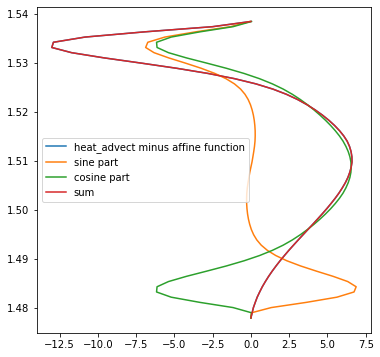

In [217]:
nz = np.arange(0,Nz,1)[None,None,:,None]
jcos = np.arange(0,Nz//2+1,1)[None,:,None,None]
jsin = np.arange(1,Nz//2+1,1)[None,:,None,None]
heat_advect_y2_rcos = (heat_advect_y2_rftcos[:,:,None,:]*np.cos(nz*jcos*2*np.pi/Nz)).sum(axis=1)
heat_advect_y2_rsin = (heat_advect_y2_rftsin[:,:,None,:]*np.sin(nz*jsin*2*np.pi/Nz)).sum(axis=1)

fig,ax=plt.subplots(1,1,figsize=(6,6))
time=15;lat=280

ax.plot(heat_advect_y2_rinterp[time,:,lat],r_lin,label="heat_advect minus affine function")

ax.plot(heat_advect_y2_rsin[time,:,lat],r_lin,label="sine part")
ax.plot(heat_advect_y2_rcos[time,:,lat],r_lin,label="cosine part")

ax.plot(heat_advect_y2_rsin[time,:,lat]+heat_advect_y2_rcos[time,:,lat],r_lin,label="sum")

ax.legend()

We now explore the dependence of $\tilde F_j(y,\omega_l)$ on both $y$ and $j$

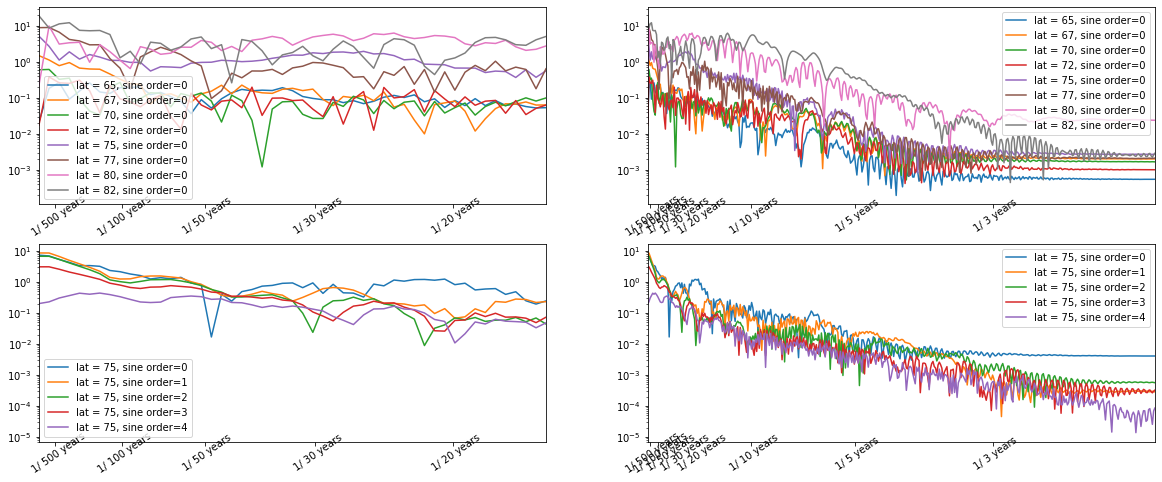

In [256]:
def setlabels(ax,lim):
    ax.set_xlim(0,lim)
    ax.set_yscale('log')
    xtickslabs=np.array([1,2,3,5,10,20,30,50,100,500])
    xtickslabs=xtickslabs[np.where(xtickslabs>=800*25/years_to_ntsteps(lim))]
    ax.set_xticks(800*25/years_to_ntsteps(xtickslabs))
    xtickslabs=['1/ %i years'%x for x in xtickslabs]
    ax.set_xticklabels(xtickslabs,rotation=35,rotation_mode='anchor')
    ax.legend()
    

fig,axx=plt.subplots(2,2,figsize=(20,8))
ax,ax2=axx[0]
for i in np.arange(65,85,2.5):
    ax.plot( np.abs(heat_advect_y2_rftsin_tft[:,0,index_of_lat(y,i)]),label='lat = %i, sine order=0'%i)
    ax2.plot(np.abs(heat_advect_y2_rftsin_tft[:,0,index_of_lat(y,i)]),label='lat = %i, sine order=0'%i)
setlabels(ax,50)
setlabels(ax2,400)

ax,ax2=axx[1]
for i in range(5):
    ax.plot( np.abs(heat_advect_y2_rftsin_tft[:,i,index_of_lat(y,77)]),label='lat = 75, sine order=%i'%i)
    ax2.plot(np.abs(heat_advect_y2_rftsin_tft[:,i,index_of_lat(y,77)]),label='lat = 75, sine order=%i'%i)
setlabels(ax,50)
setlabels(ax2,400)

## 2d fft

In [170]:
def plot_fft(da):
    r_cheb = np.array(da.radius)
    r_lin = np.linspace(r_cheb[0],r_cheb[-1],len(r_cheb))
    f = interpolate.interp1d(r_cheb, np.array(da),axis=1)
    heat_advect_y_rinterp = f(r_lin)
    
    fig,ax=plt.subplots(1,1,figsize=(12,8))
    heat_advect_fft=np.abs(np.fft.fft2(heat_advect_y_rinterp))
    pc=ax.pcolormesh(heat_advect_fft, norm=colors.LogNorm(vmin=heat_advect_fft.min(), vmax=heat_advect_fft.max()))
    fig.colorbar(pc,ax=ax)
    ax.set_xlabel("Space freq")
    ax.set_ylabel("Time freq")
    
    Dr=(r_lin[-1]-r_lin[0])*2270
    xtickslabs=np.array([2,10,20,50,40])
    ax.set_xticks(Dr/xtickslabs)
    xtickslabs=['%ikm'%x for x in xtickslabs]
    ax.set_xticklabels(xtickslabs)
    
    ytickslabs=np.array([2,20])
    ax.set_yticks(100*25/years_to_ntsteps(ytickslabs))
    ytickslabs=['%.1f years'%x for x in ytickslabs]
    ax.set_yticklabels(ytickslabs);None

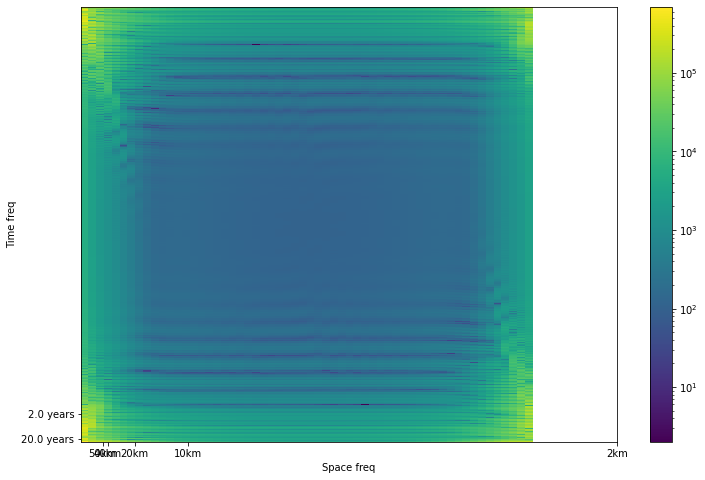

In [171]:
plot_fft(heat_advect_y70_plot)